In [2]:
!which python

/home/yimam/anaconda3/bin/python


In [1]:
import re
import random
import warnings
import unidecode
import numpy as np
import pandas as pd
import csv
from typing import List
from Levenshtein import distance 
import import_ipynb
import matplotlib.pyplot as plt
import sys
sys.path.append('../')
from preprocessing.amharicSegmenter import AmharicSegmenter
from normalizer import normalize
warnings.filterwarnings('ignore')

importing Jupyter notebook from normalizer.ipynb


In [2]:
sent_punct = []
word_punct = []
amseg = AmharicSegmenter(sent_punct,word_punct)

In [6]:
import os
for root, dirs, files in os.walk('processed/'):
    for file in files:
        with open("processed/" + file, "r",encoding="utf-8") as f:
            tokens = f.read().split()
#            tokens = amseg.amharic_tokenizer(content)
#            tokens = [token.text for token in tokens]
            utokens = set(tokens)

            print(len(tokens),len(utokens))
            print (tokens.count(tokens[1]))


16184314 836960
926
35138883 1446265
722
27261275 1420480
171493


In [7]:
with open('amstopwords.txt', 'r',encoding="utf-8") as f:
    stop_word_list = f.read().splitlines()
stopword_free_tokens={}
stopword_free_tokens=[x for x in tokens if x not in stop_word_list]

In [ ]:
#stopword_free_tokens

In [8]:
hm1 =['ሀ','ሁ', 'ሂ', 'ሃ', 'ሄ', 'ህ', 'ሆ', 'ሐ', 'ሑ', 'ሒ', 'ሓ', 'ሔ', 'ሕ', 'ሖ', 
               'ኀ', 'ኁ', 'ኂ', 'ኃ', 'ኄ', 'ኅ', 'ኆ', 'ኸ', 'ኹ', 'ኺ', 'ኻ', 'ኼ', 'ኽ', 'ኾ', 
               'አ', 'ኡ', 'ኢ', 'ኣ', 'ኤ', 'እ', 'ኦ', 'ዐ', 'ዑ', 'ዒ', 'ዓ', 'ዔ', 'ዕ', 'ዖ', 
               'ሰ', 'ሱ', 'ሲ', 'ሳ', 'ሴ', 'ስ', 'ሶ', 'ሠ', 'ሡ', 'ሢ', 'ሣ', 'ሤ', 'ሥ', 'ሦ', 
               'ጸ', 'ጹ', 'ጺ', 'ጻ', 'ጼ', 'ጽ', 'ጾ', 'ፀ', 'ፁ', 'ፂ', 'ፃ', 'ፄ', 'ፅ', 'ፆ' ]

# Dictionary of words with frequency

In [9]:
freq_tokens = {}
for t in stopword_free_tokens:
    freq_tokens[t] = freq_tokens.get(t, 0) + 1

In [10]:
htokens = {}
for k,v in freq_tokens.items():
    for hm in hm1:
        if hm in k:
            htokens[k]=v

In [12]:
homo_top=dict(sorted(htokens.items(), key=lambda item: item[1],reverse=True)[:20])

In [13]:
homo_top

{'ሰው': 97784,
 'ህዝብ': 60945,
 'አዲስ': 47781,
 'ሰዎች': 46510,
 'አበባ': 45644,
 'መንግስት': 44000,
 'እንኳን': 42172,
 'እንዴት': 35736,
 'አብይ': 35448,
 'ሀገር': 33540,
 'ስራ': 28096,
 'አማራ': 27222,
 'እንዲህ': 27090,
 'አመት': 25659,
 'የአማራ': 23455,
 'ዓመት': 21102,
 'ሁሉም': 20814,
 'አገር': 20659,
 'በኢትዮጵያ': 20591,
 'እግዚአብሔር': 20360}

In [ ]:
#print top homophone character contained words
#homo_top  
#plt.bar(*zip(*homo_top.items()))
#plt.show()

# Homophone character statistics

In [14]:
frq_homo_char={}
for h in hm1:
    hm=(len([w for w in stopword_free_tokens if h in w]))
    frq_homo_char[h] =hm
#frq_homo_char

In [15]:
frq_homo_char

{'ሀ': 252040,
 'ሁ': 483848,
 'ሂ': 27388,
 'ሃ': 237880,
 'ሄ': 132870,
 'ህ': 974987,
 'ሆ': 375386,
 'ሐ': 61445,
 'ሑ': 3259,
 'ሒ': 2759,
 'ሓ': 24232,
 'ሔ': 66737,
 'ሕ': 95955,
 'ሖ': 354,
 'ኀ': 1964,
 'ኁ': 146,
 'ኂ': 73,
 'ኃ': 47640,
 'ኄ': 333,
 'ኅ': 12071,
 'ኆ': 88,
 'ኸ': 17499,
 'ኹ': 2168,
 'ኺ': 334,
 'ኻ': 1802,
 'ኼ': 2480,
 'ኽ': 4670,
 'ኾ': 2032,
 'አ': 2736530,
 'ኡ': 16449,
 'ኢ': 273894,
 'ኣ': 66353,
 'ኤ': 99043,
 'እ': 1771423,
 'ኦ': 133481,
 'ዐ': 23568,
 'ዑ': 7527,
 'ዒ': 2018,
 'ዓ': 150380,
 'ዔ': 3404,
 'ዕ': 103707,
 'ዖ': 2109,
 'ሰ': 1137332,
 'ሱ': 234282,
 'ሲ': 257246,
 'ሳ': 594066,
 'ሴ': 96536,
 'ስ': 2207487,
 'ሶ': 84887,
 'ሠ': 48878,
 'ሡ': 2230,
 'ሢ': 1077,
 'ሣ': 13608,
 'ሤ': 733,
 'ሥ': 82292,
 'ሦ': 5080,
 'ጸ': 33263,
 'ጹ': 10227,
 'ጺ': 1249,
 'ጻ': 26792,
 'ጼ': 1560,
 'ጽ': 65478,
 'ጾ': 3826,
 'ፀ': 70687,
 'ፁ': 19748,
 'ፂ': 3237,
 'ፃ': 59122,
 'ፄ': 4720,
 'ፅ': 99335,
 'ፆ': 7123}

In [50]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
dpi=300
plt.figure(figsize=(8, 6), edgecolor='black', linewidth=2)
prop = fm.FontProperties(fname='AbyssinicaSIL-Regular.ttf', weight='bold')
#prop = fm.FontProperties(fname='Chiret-Regular.ttf', weight='bold')



<Figure size 576x432 with 0 Axes>

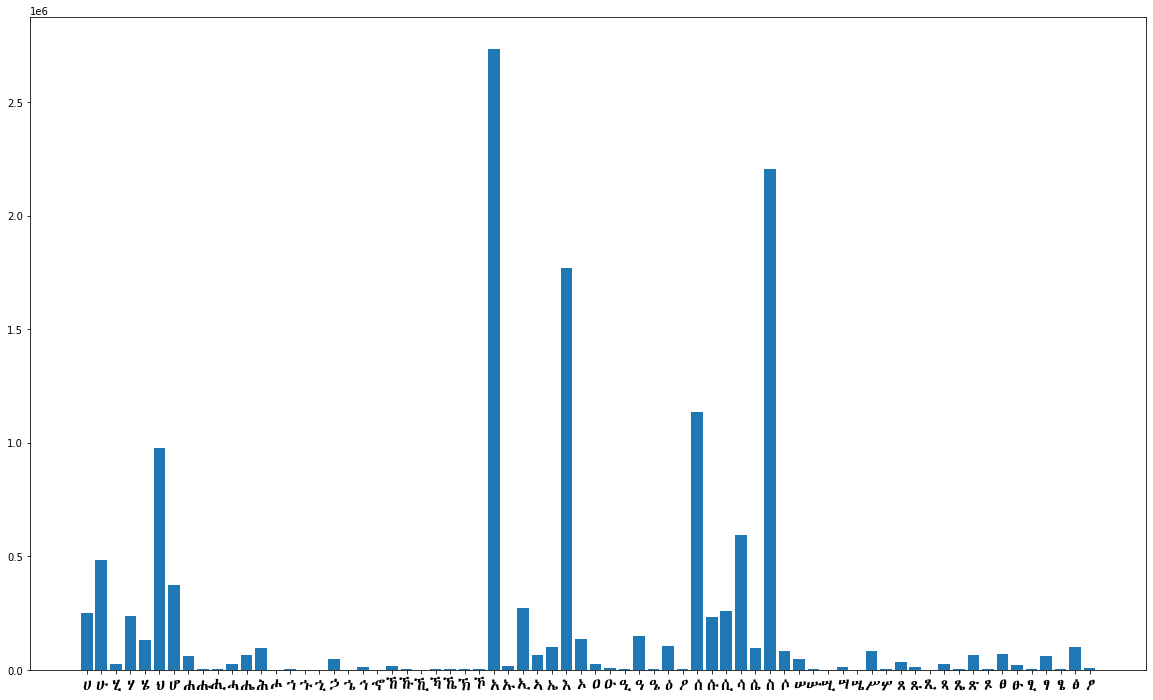

In [51]:
f, ax = plt.subplots(figsize=(20,12))
plt.bar(*zip(*frq_homo_char.items()))
plt.xticks(fontproperties=prop, ha='center', fontsize = 16)
plt.show()

# frequency based normalization

In [ ]:
#tokens list normalization
def fnormalize (tokens):
    tokens = [item.replace("ሃ", "ሀ") for item in tokens]
    tokens = [item.replace("ሐ", "ሀ") for item in tokens]
    tokens = [item.replace("ሓ", "ሀ") for item in tokens]
    tokens = [item.replace("ኃ", "ሀ") for item in tokens]
    tokens = [item.replace("ኻ", "ሀ") for item in tokens]
    tokens = [item.replace("ሑ", "ሁ") for item in tokens]
    tokens = [item.replace("ኁ", "ሁ") for item in tokens]
    tokens = [item.replace("ሑ", "ሁ") for item in tokens]
    tokens = [item.replace("ኂ", "ሂ") for item in tokens]
    tokens = [item.replace("ሒ", "ሂ") for item in tokens]
    tokens = [item.replace("ኄ", "ሄ") for item in tokens]
    tokens = [item.replace("ዄ", "ሄ") for item in tokens]
    tokens = [item.replace("ሔ", "ሄ") for item in tokens]
    tokens = [item.replace("ሕ", "ህ") for item in tokens]
    tokens = [item.replace("ኅ", "ህ") for item in tokens]
    tokens = [item.replace("ሖ", "ሆ") for item in tokens]
    tokens = [item.replace("ኆ", "ሆ") for item in tokens]
    tokens = [item.replace("ኾ", "ሆ") for item in tokens]
    
    tokens = [item.replace("ሠ", "ሰ") for item in tokens]
    tokens = [item.replace("ሡ", "ሱ") for item in tokens]
    tokens = [item.replace("ሢ", "ሲ") for item in tokens]
    tokens = [item.replace("ሣ", "ሳ") for item in tokens]
    tokens = [item.replace("ሤ", "ሴ") for item in tokens]
    tokens = [item.replace("ሥ", "ስ") for item in tokens]
    tokens = [item.replace("ሦ", "ሶ") for item in tokens]
       
    tokens = [item.replace("ጸ", "ፀ") for item in tokens]
    tokens = [item.replace("ጹ", "ፁ") for item in tokens]
    tokens = [item.replace("ጺ", "ፂ") for item in tokens]
    tokens = [item.replace("ጻ", "ፂ") for item in tokens]
    tokens = [item.replace("ጼ", "ፄ") for item in tokens]
    tokens = [item.replace("ጽ", "ፅ") for item in tokens]
    tokens = [item.replace("ጾ", "ፆ") for item in tokens]
    
    tokens = [item.replace("ዐ", "አ") for item in tokens]
    tokens = [item.replace("ዑ", "ኡ") for item in tokens]
    tokens = [item.replace("ዒ", "ኢ") for item in tokens]
    tokens = [item.replace("ዓ", "አ") for item in tokens]
    tokens = [item.replace("ኣ", "አ") for item in tokens]
    tokens = [item.replace("ዔ", "ኤ") for item in tokens]
    tokens = [item.replace("ዕ", "እ") for item in tokens]
    tokens = [item.replace("ዖ", "ኦ") for item in tokens]
    
    return tokens
norm_tokens=fnormalize(tokens)

In [ ]:
#norm_tokens

# search homophone word
የትርጉም ለውጥ የሌላቸው ቃላት ምሳሌ
አገር ሀገር ሃገር አህጉር
መጽሀፍ መጽሐፍ መፅሐፍ መጽሃፍ
ህይወት ሕይወት ኅይወት ሕይዎት
አስር ዐስር አሥር
ሕዝብ ህዝብ

የትርጉም ለውጥ ያላቸው ቃላት …
ድህነት=ማጣት፣መቸገር  
ድሕነት     
ድኅነት=የስጋ ወይም የነፍስ መዳን

አመተ=አገልጋይ   
ዐመተ=በጋብቻ ተዛመደ(ዐማት፥)  
ዓመተ=ዓመተ-ምሕረት 
         
ሠየመ=ሾመ፤ ማዕረግ ሰጠ    
ሰየመ=ስም አወጣ

# frequency of given homophone word

In [ ]:
hmw = ['አገር', 'ዓገር', 'ሀገር', 'ሃገር', 'ሐገር', 'ኃገር', 'ድህነት', 'ድሕነት', 'ድኅነት', 'ሠየመ', 'ሰየመ', 'ሕዝብ', 'ህዝብ', 'መሣል', 'መሳል', 'ሠረገ', 'ሰረገ']
frq_homo_wrd={}
for h in hmw:
    hm=(len([w for w in stopword_free_tokens if h in w]))
    frq_homo_wrd[h] =hm
#frq_homo_wrd

In [ ]:
frq_homo_wrd